In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load data
with open('../dataset/legal_corpus.json', 'r', encoding='utf-8') as f:
    legal_corpus = json.load(f)

with open('../dataset/train.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

with open('../dataset/public_test.json', 'r', encoding='utf-8') as f:
    public_test = json.load(f)

with open('../dataset/private_test.json', 'r', encoding='utf-8') as f:
    private_test = json.load(f)

print(f"Legal corpus: {len(legal_corpus)} articles")
print(f"Train questions: {len(train_data)}")
print(f"Public test: {len(public_test)}")
print(f"Private test: {len(private_test)}")

Legal corpus: 2157 articles
Train questions: 2190
Public test: 312
Private test: 627


# Exploratory Data Analysis (EDA)
## VLSP 2025 DRiLL Dataset

Notebook này thực hiện phân tích dữ liệu cho dataset VLSP 2025 DRiLL, bao gồm:
- Thống kê độ dài tổng thể
- Phân tích phân bố độ dài
- Phân tích nội dung và từ vựng


## 1. Key Statistics - Document Length Analysis

Tạo bảng thống kê độ dài tổng thể của dataset

In [ ]:
def count_words(text):
    """Đếm số từ trong text"""
    if not text or not isinstance(text, str):
        return 0
    return len(text.lower().split())

# Legal Corpus (Articles)
print("Calculating statistics for Legal Corpus (Articles)...")
article_lengths = [] 
for article in legal_corpus:
    content_list = article.get('content', [])
    if isinstance(content_list, list):
        for item in content_list:
            if isinstance(item, dict):
                content_article = item.get('content_Article', '')
                if content_article:
                    word_count = count_words(content_article)
                    article_lengths.append(word_count)
            elif isinstance(item, str):
                word_count = count_words(item)
                article_lengths.append(word_count)
    elif isinstance(content_list, str):
        word_count = count_words(content_list)
        article_lengths.append(word_count)

# Train Questions
print("Calculating statistics for Train Questions...")
train_question_lengths = [count_words(item.get('question', '')) for item in train_data]

# Public Test Questions
print("Calculating statistics for Public Test Questions...")
public_test_lengths = [count_words(item.get('question', '')) for item in public_test]

# Private Test Questions
print("Calculating statistics for Private Test Questions...")
private_test_lengths = [count_words(item.get('question', '')) for item in private_test]

# Tạo bảng thống kê
stats_data = {
    'Dataset': [
        'Train (Articles)',
        'Train (Questions)',
        'Public Test (Questions)',
        'Private Test (Questions)'
    ],
    'Total (rows)': [
        len(article_lengths),  # Tổng số content_Article
        len(train_data),
        len(public_test),
        len(private_test)
    ],
    'Max (words)': [
        max(article_lengths) if article_lengths else 0,
        max(train_question_lengths) if train_question_lengths else 0,
        max(public_test_lengths) if public_test_lengths else 0,
        max(private_test_lengths) if private_test_lengths else 0
    ],
    'Min (words)': [
        min(article_lengths) if article_lengths else 0,
        min(train_question_lengths) if train_question_lengths else 0,
        min(public_test_lengths) if public_test_lengths else 0,
        min(private_test_lengths) if private_test_lengths else 0
    ],
    'Avg (words)': [
        np.mean(article_lengths) if article_lengths else 0,
        np.mean(train_question_lengths) if train_question_lengths else 0,
        np.mean(public_test_lengths) if public_test_lengths else 0,
        np.mean(private_test_lengths) if private_test_lengths else 0
    ]
}

stats_df = pd.DataFrame(stats_data)
stats_df['Avg (words)'] = stats_df['Avg (words)'].round(2)

# Hiển thị bảng
print("\n" + "="*80)
print("Table 1: Key statistics of the VLSP 2025 DRiLL dataset")
print("="*80)
print(stats_df.to_string(index=False))
print("\nNote: Total indicates the number of rows, while Max/Min/Avg are measured in words.")
print("="*80)

# Lưu để sử dụng sau
stats_df

Calculating statistics for Legal Corpus (Articles)...
Calculating statistics for Train Questions...
Calculating statistics for Public Test Questions...
Calculating statistics for Private Test Questions...

Table 1: Key statistics of the VLSP 2025 DRiLL dataset
                 Dataset  Total (rows)  Max (words)  Min (words)  Avg (words)
        Train (Articles)         59635        55097            0       303.24
       Train (Questions)          2190           45            6        19.71
 Public Test (Questions)           312           42           11        20.00
Private Test (Questions)           627           44           11        19.90

Note: Total indicates the number of rows, while Max/Min/Avg are measured in words.


,Dataset,Total (rows),Max (words),Min (words),Avg (words)
0,Train (Articles),59635,55097,0,303.24
1,Train (Questions),2190,45,6,19.71
2,Public Test (Questions),312,42,11,20.00
3,Private Test (Questions),627,44,11,19.90


## 2. Distribution Analysis - Document Length Distributions


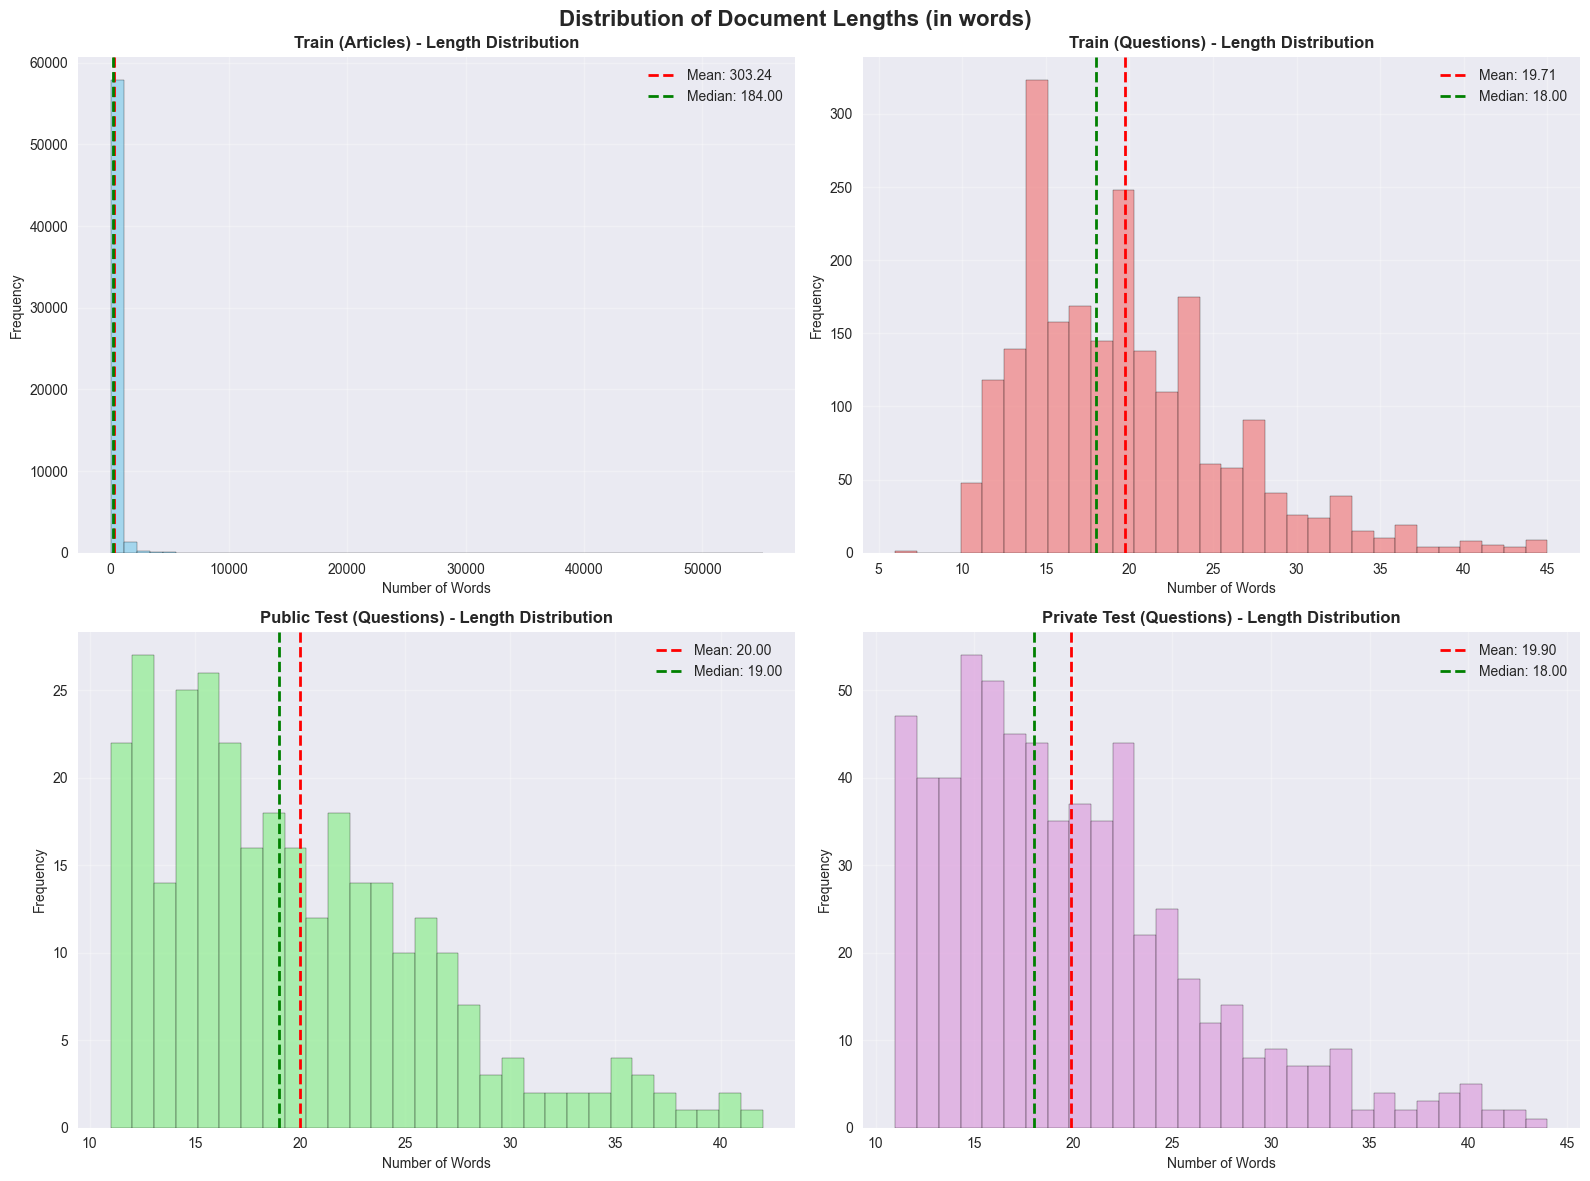

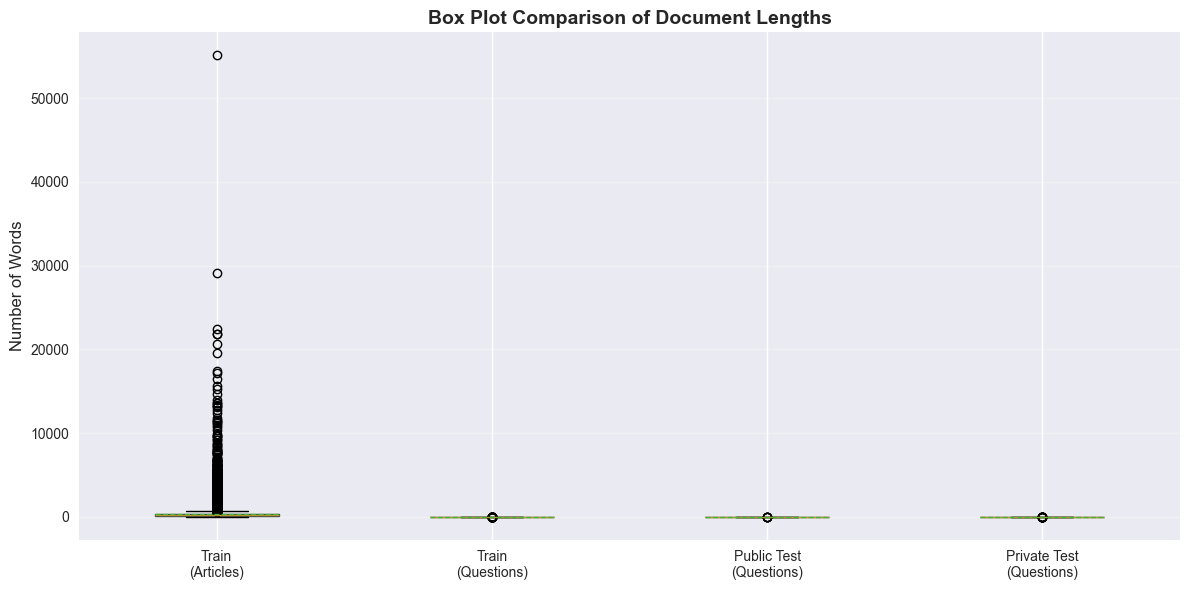

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Document Lengths (in words)', fontsize=16, fontweight='bold')

# 1. Legal Corpus (Articles)
axes[0, 0].hist(article_lengths, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(np.mean(article_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(article_lengths):.2f}')
axes[0, 0].axvline(np.median(article_lengths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(article_lengths):.2f}')
axes[0, 0].set_title('Train (Articles) - Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Words', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Train Questions
axes[0, 1].hist(train_question_lengths, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].axvline(np.mean(train_question_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(train_question_lengths):.2f}')
axes[0, 1].axvline(np.median(train_question_lengths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(train_question_lengths):.2f}')
axes[0, 1].set_title('Train (Questions) - Length Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Public Test Questions
axes[1, 0].hist(public_test_lengths, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].axvline(np.mean(public_test_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(public_test_lengths):.2f}')
axes[1, 0].axvline(np.median(public_test_lengths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(public_test_lengths):.2f}')
axes[1, 0].set_title('Public Test (Questions) - Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Words', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Private Test Questions
axes[1, 1].hist(private_test_lengths, bins=30, edgecolor='black', alpha=0.7, color='plum')
axes[1, 1].axvline(np.mean(private_test_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(private_test_lengths):.2f}')
axes[1, 1].axvline(np.median(private_test_lengths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(private_test_lengths):.2f}')
axes[1, 1].set_title('Private Test (Questions) - Length Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Words', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots
fig, ax = plt.subplots(figsize=(12, 6))
box_data = [article_lengths, train_question_lengths, public_test_lengths, private_test_lengths]
box_labels = ['Train\n(Articles)', 'Train\n(Questions)', 'Public Test\n(Questions)', 'Private Test\n(Questions)']

bp = ax.boxplot(box_data, labels=box_labels, patch_artist=True, 
                showmeans=True, meanline=True)
ax.set_title('Box Plot Comparison of Document Lengths', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Words', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Colours for boxes
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

## 3. Relevant Laws Analysis

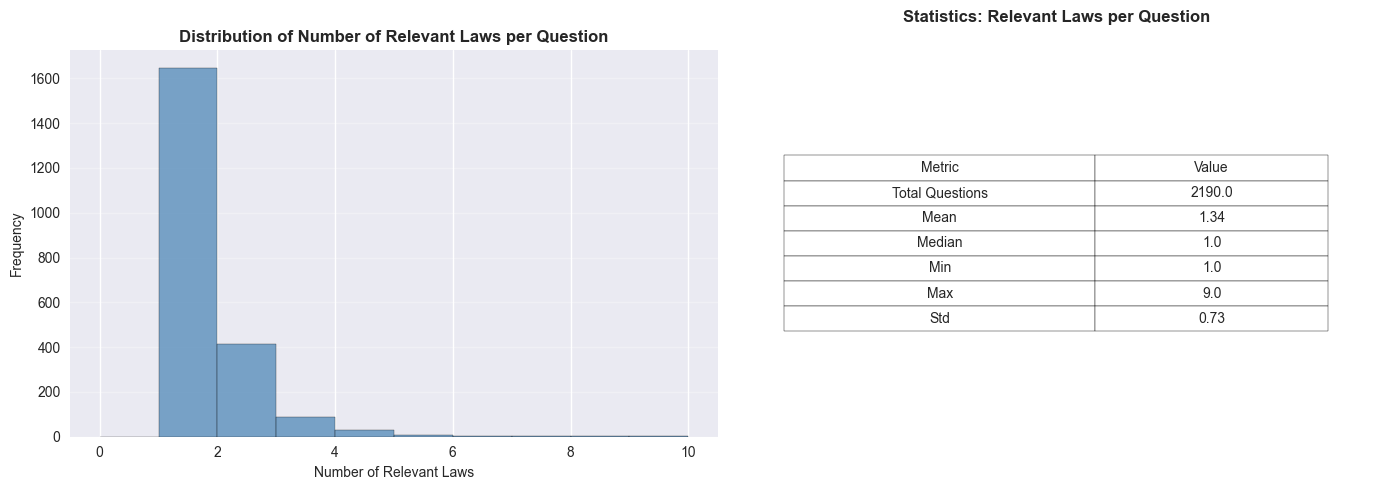


Questions with 0 relevant laws: 0 (0.00%)
Questions with 1+ relevant laws: 2190 (100.00%)


In [4]:
# Phân tích số lượng relevant laws trong train data
train_relevant_counts = [len(item.get('relevant_laws', [])) for item in train_data]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_relevant_counts, bins=range(0, max(train_relevant_counts)+2), 
             edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Distribution of Number of Relevant Laws per Question', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Relevant Laws', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Statistics
stats_relevant = {
    'Metric': ['Total Questions', 'Mean', 'Median', 'Min', 'Max', 'Std'],
    'Value': [
        len(train_relevant_counts),
        np.mean(train_relevant_counts),
        np.median(train_relevant_counts),
        min(train_relevant_counts),
        max(train_relevant_counts),
        np.std(train_relevant_counts)
    ]
}
stats_relevant_df = pd.DataFrame(stats_relevant)
stats_relevant_df['Value'] = stats_relevant_df['Value'].round(2)

# Table
axes[1].axis('tight')
axes[1].axis('off')
table = axes[1].table(cellText=stats_relevant_df.values, 
                      colLabels=stats_relevant_df.columns,
                      cellLoc='center', loc='center',
                      colWidths=[0.4, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1].set_title('Statistics: Relevant Laws per Question', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"\nQuestions with 0 relevant laws: {sum(1 for x in train_relevant_counts if x == 0)} ({sum(1 for x in train_relevant_counts if x == 0)/len(train_relevant_counts)*100:.2f}%)")
print(f"Questions with 1+ relevant laws: {sum(1 for x in train_relevant_counts if x > 0)} ({sum(1 for x in train_relevant_counts if x > 0)/len(train_relevant_counts)*100:.2f}%)")

## 4. Legal Corpus Analysis

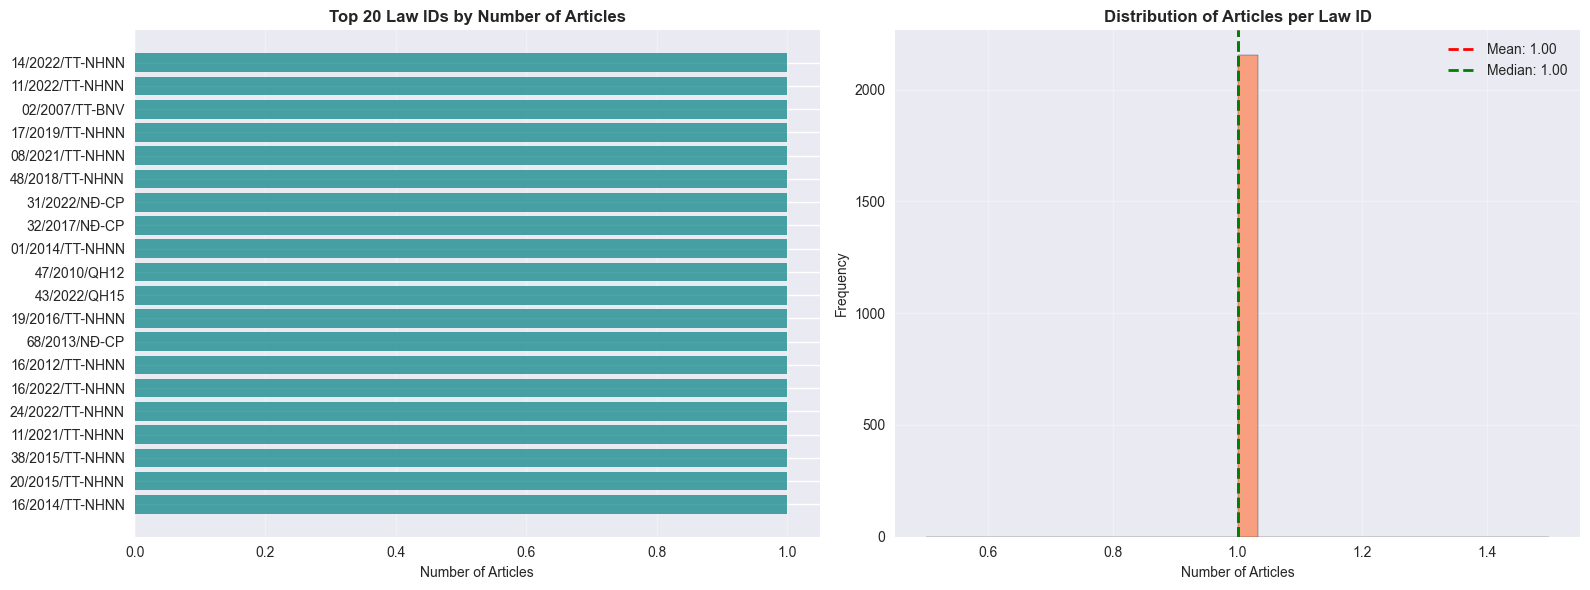


Total unique law IDs: 2157
Total articles: 2157
Average articles per law: 1.00
Median articles per law: 1.00


In [5]:
# Phân tích legal corpus
law_ids = [item.get('law_id', 'Unknown') for item in legal_corpus]
law_id_counts = Counter(law_ids)

# Top 20 law IDs
top_laws = law_id_counts.most_common(20)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart top laws
top_law_names = [law[0] for law in top_laws]
top_law_counts = [law[1] for law in top_laws]

axes[0].barh(range(len(top_law_names)), top_law_counts, color='teal', alpha=0.7)
axes[0].set_yticks(range(len(top_law_names)))
axes[0].set_yticklabels(top_law_names)
axes[0].set_xlabel('Number of Articles', fontsize=10)
axes[0].set_title('Top 20 Law IDs by Number of Articles', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Distribution of articles per law
articles_per_law = list(law_id_counts.values())
axes[1].hist(articles_per_law, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(np.mean(articles_per_law), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {np.mean(articles_per_law):.2f}')
axes[1].axvline(np.median(articles_per_law), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {np.median(articles_per_law):.2f}')
axes[1].set_title('Distribution of Articles per Law ID', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Articles', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTotal unique law IDs: {len(law_id_counts)}")
print(f"Total articles: {len(legal_corpus)}")
print(f"Average articles per law: {np.mean(articles_per_law):.2f}")
print(f"Median articles per law: {np.median(articles_per_law):.2f}")

## 5. Question Length Comparison: Train vs Test Sets

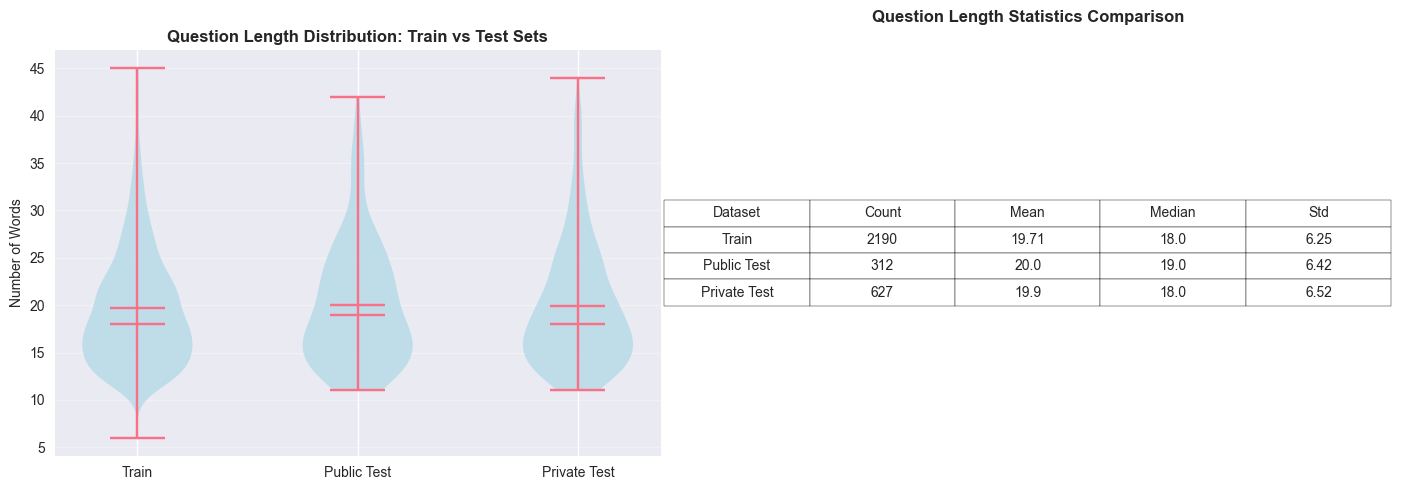

In [6]:
# So sánh độ dài câu hỏi giữa train và test sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot
violin_data = [train_question_lengths, public_test_lengths, private_test_lengths]
violin_labels = ['Train', 'Public Test', 'Private Test']

parts = axes[0].violinplot(violin_data, positions=range(len(violin_labels)), 
                           showmeans=True, showmedians=True)
axes[0].set_xticks(range(len(violin_labels)))
axes[0].set_xticklabels(violin_labels)
axes[0].set_ylabel('Number of Words', fontsize=10)
axes[0].set_title('Question Length Distribution: Train vs Test Sets', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Tô màu
for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_alpha(0.7)

# Comparison table
comparison_data = {
    'Dataset': ['Train', 'Public Test', 'Private Test'],
    'Count': [len(train_question_lengths), len(public_test_lengths), len(private_test_lengths)],
    'Mean': [np.mean(train_question_lengths), np.mean(public_test_lengths), np.mean(private_test_lengths)],
    'Median': [np.median(train_question_lengths), np.median(public_test_lengths), np.median(private_test_lengths)],
    'Std': [np.std(train_question_lengths), np.std(public_test_lengths), np.std(private_test_lengths)]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df['Mean'] = comparison_df['Mean'].round(2)
comparison_df['Median'] = comparison_df['Median'].round(2)
comparison_df['Std'] = comparison_df['Std'].round(2)

axes[1].axis('tight')
axes[1].axis('off')
table = axes[1].table(cellText=comparison_df.values, 
                      colLabels=comparison_df.columns,
                      cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1].set_title('Question Length Statistics Comparison', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 6. Summary Statistics

In [ ]:
detailed_stats = {
    'Dataset': ['Train (Articles)', 'Train (Questions)', 'Public Test (Questions)', 'Private Test (Questions)'],
    'Total': [len(article_lengths), len(train_data), len(public_test), len(private_test)],  
    'Mean': [
        np.mean(article_lengths),
        np.mean(train_question_lengths),
        np.mean(public_test_lengths),
        np.mean(private_test_lengths)
    ],
    'Median': [
        np.median(article_lengths),
        np.median(train_question_lengths),
        np.median(public_test_lengths),
        np.median(private_test_lengths)
    ],
    'Std': [
        np.std(article_lengths),
        np.std(train_question_lengths),
        np.std(public_test_lengths),
        np.std(private_test_lengths)
    ],
    'Min': [
        min(article_lengths),
        min(train_question_lengths),
        min(public_test_lengths),
        min(private_test_lengths)
    ],
    'Max': [
        max(article_lengths),
        max(train_question_lengths),
        max(public_test_lengths),
        max(private_test_lengths)
    ],
    'Q1': [
        np.percentile(article_lengths, 25),
        np.percentile(train_question_lengths, 25),
        np.percentile(public_test_lengths, 25),
        np.percentile(private_test_lengths, 25)
    ],
    'Q3': [
        np.percentile(article_lengths, 75),
        np.percentile(train_question_lengths, 75),
        np.percentile(public_test_lengths, 75),
        np.percentile(private_test_lengths, 75)
    ]
}

detailed_df = pd.DataFrame(detailed_stats)
for col in ['Mean', 'Median', 'Std', 'Q1', 'Q3']:
    detailed_df[col] = detailed_df[col].round(2)

print("="*100)
print("Detailed Statistics Summary")
print("="*100)
print(detailed_df.to_string(index=False))
print("="*100)

stats_df.to_csv('./eda_statistics_table.csv', index=False, encoding='utf-8')

Detailed Statistics Summary
                 Dataset  Total   Mean  Median    Std  Min   Max   Q1    Q3
        Train (Articles)  59635 303.24   184.0 591.90    0 55097 97.0 344.0
       Train (Questions)   2190  19.71    18.0   6.25    6    45 15.0  23.0
 Public Test (Questions)    312  20.00    19.0   6.42   11    42 15.0  24.0
Private Test (Questions)    627  19.90    18.0   6.52   11    44 15.0  23.0
